   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

<Figure size 1440x1440 with 0 Axes>

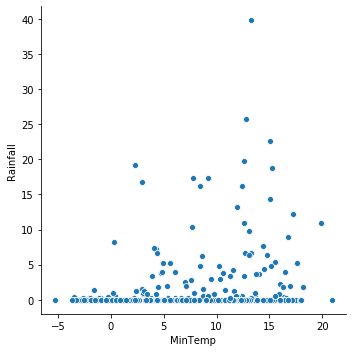

<Figure size 1440x1440 with 0 Axes>

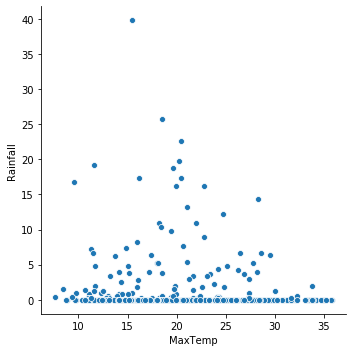

<Figure size 1440x1440 with 0 Axes>

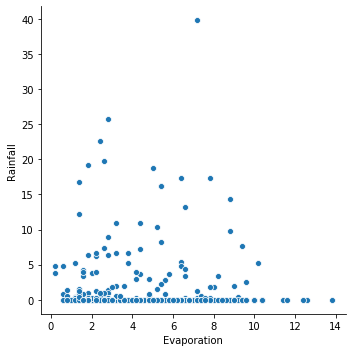

<Figure size 1440x1440 with 0 Axes>

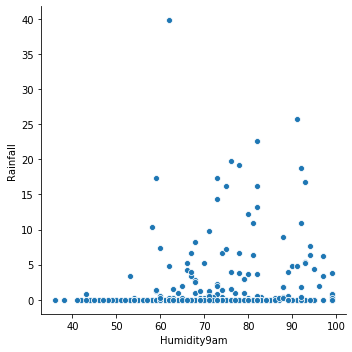

<Figure size 1440x1440 with 0 Axes>

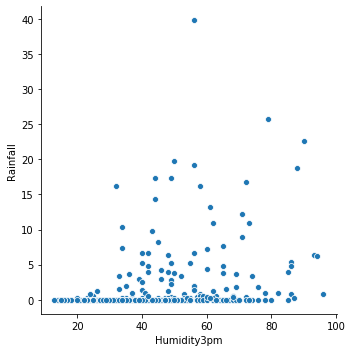

<Figure size 1440x1440 with 0 Axes>

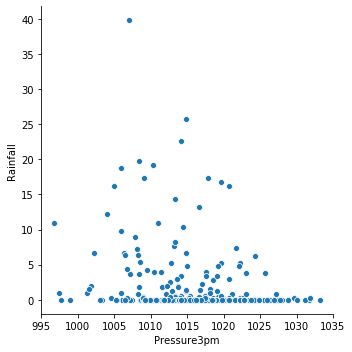

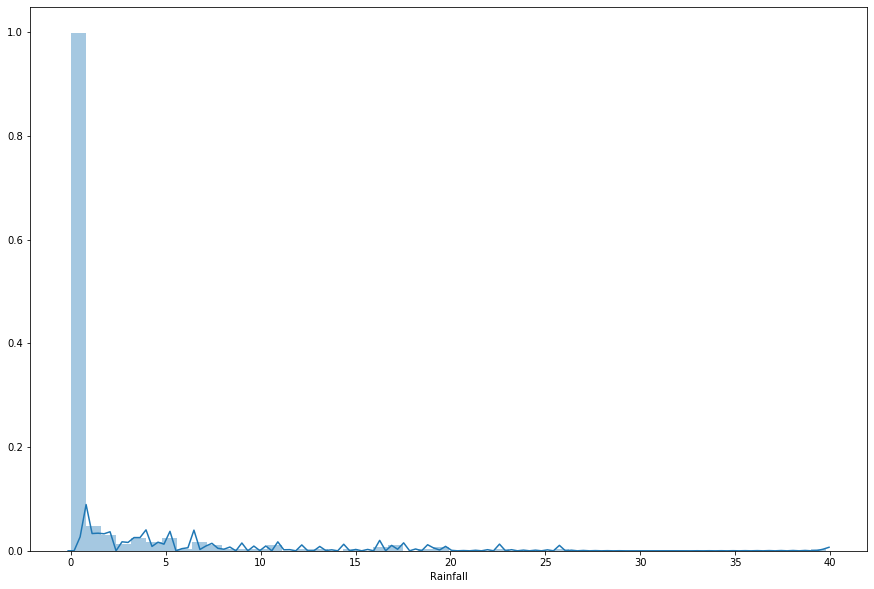

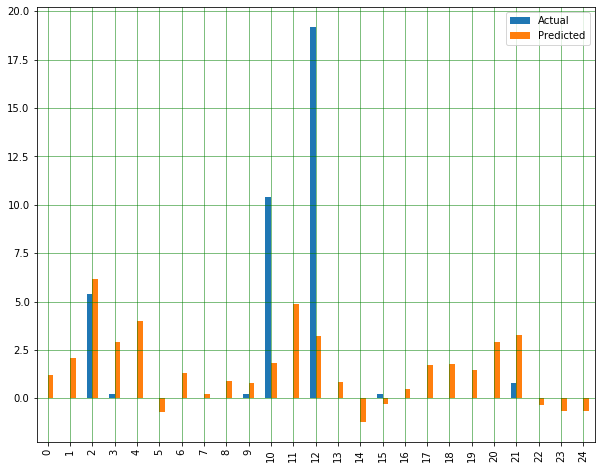

In [19]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#enter dataset
dataset = pd.read_csv("weather.csv")
print(dataset.head(5))
print(dataset.shape)

# drop or delete the unnecessary columns in the data. 
clean_data_1 = dataset.drop(['Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am',
                             'Pressure9am','Cloud9am','Temp9am','Temp3pm','RainToday','RISK_MM','RainTomorrow','Cloud3pm','WindSpeed3pm'], axis = 1) 
print(clean_data_1)
clean_data_1.to_csv('multi_test.csv')

#to check data types
data_type = clean_data_1.dtypes
print(data_type)

# statistical parameters
stats = clean_data_1.describe()
print(stats)

#plot
plt.figure(figsize=(20,20))
sns.relplot(x='MinTemp',y='Rainfall',data=clean_data_1)
plt.figure(figsize=(20,20))
sns.relplot(x='MaxTemp',y='Rainfall',data=clean_data_1)
plt.figure(figsize=(20,20))
sns.relplot(x='Evaporation',y='Rainfall',data=clean_data_1)
plt.figure(figsize=(20,20))
sns.relplot(x='Humidity9am',y='Rainfall',data=clean_data_1)
plt.figure(figsize=(20,20))
sns.relplot(x='Humidity3pm',y='Rainfall',data=clean_data_1)
plt.figure(figsize=(20,20))
sns.relplot(x='Pressure3pm',y='Rainfall',data=clean_data_1)

#for all the plots uncomment this
#all_plot = sns.PairGrid(clean_data_1)
#all_plot.map(plt.scatter)

# seperating attributes and labels
X = clean_data_1[['MinTemp','MaxTemp','Evaporation','Humidity9am',
                  'Humidity3pm','Pressure3pm']].values
Y = clean_data_1['Rainfall'].values
print(X)
print(Y)

# checking avg of rainfall column
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(clean_data_1['Rainfall'])

#splitting data set in two parts 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

#training the model by regression algo
reg_data = LinearRegression()
reg_data.fit(X_train, Y_train)

# finding coeff of the corresponding input.....B1,B2,B3,B4
coeff_data = pd.DataFrame(reg_data.coef_)
print(coeff_data)

#prediction using test data set
Y_prediction = reg_data.predict(X_test)

#comparing actual and predicted data
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_prediction.flatten()})
print(df)

# graphical comparision of predicted and actual
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()